In [1]:
import pandas as pd
%matplotlib inline
import tangos
import tangos.examples.mergers as mergers

import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
h = 0.6776942783267969
pd.set_option("display.max_rows", None, "display.max_columns", None)

from tangos_halo_module.halo_properties import track_halo_property, get_timesteps, ID_to_sim_halo_snap, infall_final_n_particles, infall_final_coordinates, apocentric_distance, disruption_time, accretion_time, orbit_interpolation, infall_velocity, quenching_time, max_sSFR_time, max_mass_time 
from tangos_halo_module.path import get_file_path, get_halo_snap_num, read_file
from tangos_halo_module.halos import ID_to_tangos_halo, get_survivors, get_main_progenitor_branch, get_zombies, get_host, get_survivor_IDs, get_zombie_IDs, blockPrint, enablePrint, tangos_to_pynbody_halo

In [18]:
# df = pd.read_csv('Data100.csv')
# ids = df['ID'].to_numpy()

# # for idx in ids:
# #     print(accretion_time(ID=idx, category='dm', resolution='Mint'))
# infall_virial_mass = [accretion_time(ID=idx, category='dm', resolution=100)[1] for idx in ids]

# print(infall_virial_mass)
# df['infall_virial_mass']=infall_virial_mass

# df.to_csv('Data100.csv', index=False)

[10690220624.038225, 37512818.00479018, 49412655.146213904, 10690220624.038225, 690224845.5330594, 4024440033.2442, 282826219.3397921, 53867614023.65077, 67113555.31011501, 324946951.8206375, 9781839.213368986, 5024283063.716423, 88056883.74867068, 656113104.03348, 27430150301.27193, 82133158.06181614, 1545400478.410861, 63216745.440308094, 2743421646.694189, 17778563928.197357, 186750179.19568044, 879938581.8078629, 2520609321.865905, 97150185.57525964, 3239412535.1160054, 500102459.6084248, 66147027.730365336, 54050591.47879901, 206269807.49432716, 458620792.8320415, 31769697.84310974, 44943464.68893218, 3644456851.3863654, 378316731.6274294, 338631632.3828905, 353631039.8450975, 248714477.84021276, 4956940583.279089, 57961700.697878614, 378316731.6274294, 104624475.77092588, 910644909.55885, 269119174.8663543, 13186371959.399315, 725959664.8292314, 642882478.6377059, 643903086.2208661, 7178408873.748763, 30927662702.288696, 4611397824.645823, 1166020444.4607368, 934736941.1533676, 4

In [3]:
# data = pd.read_csv('Data100.csv')
# myIDs = data['ID'].to_numpy()

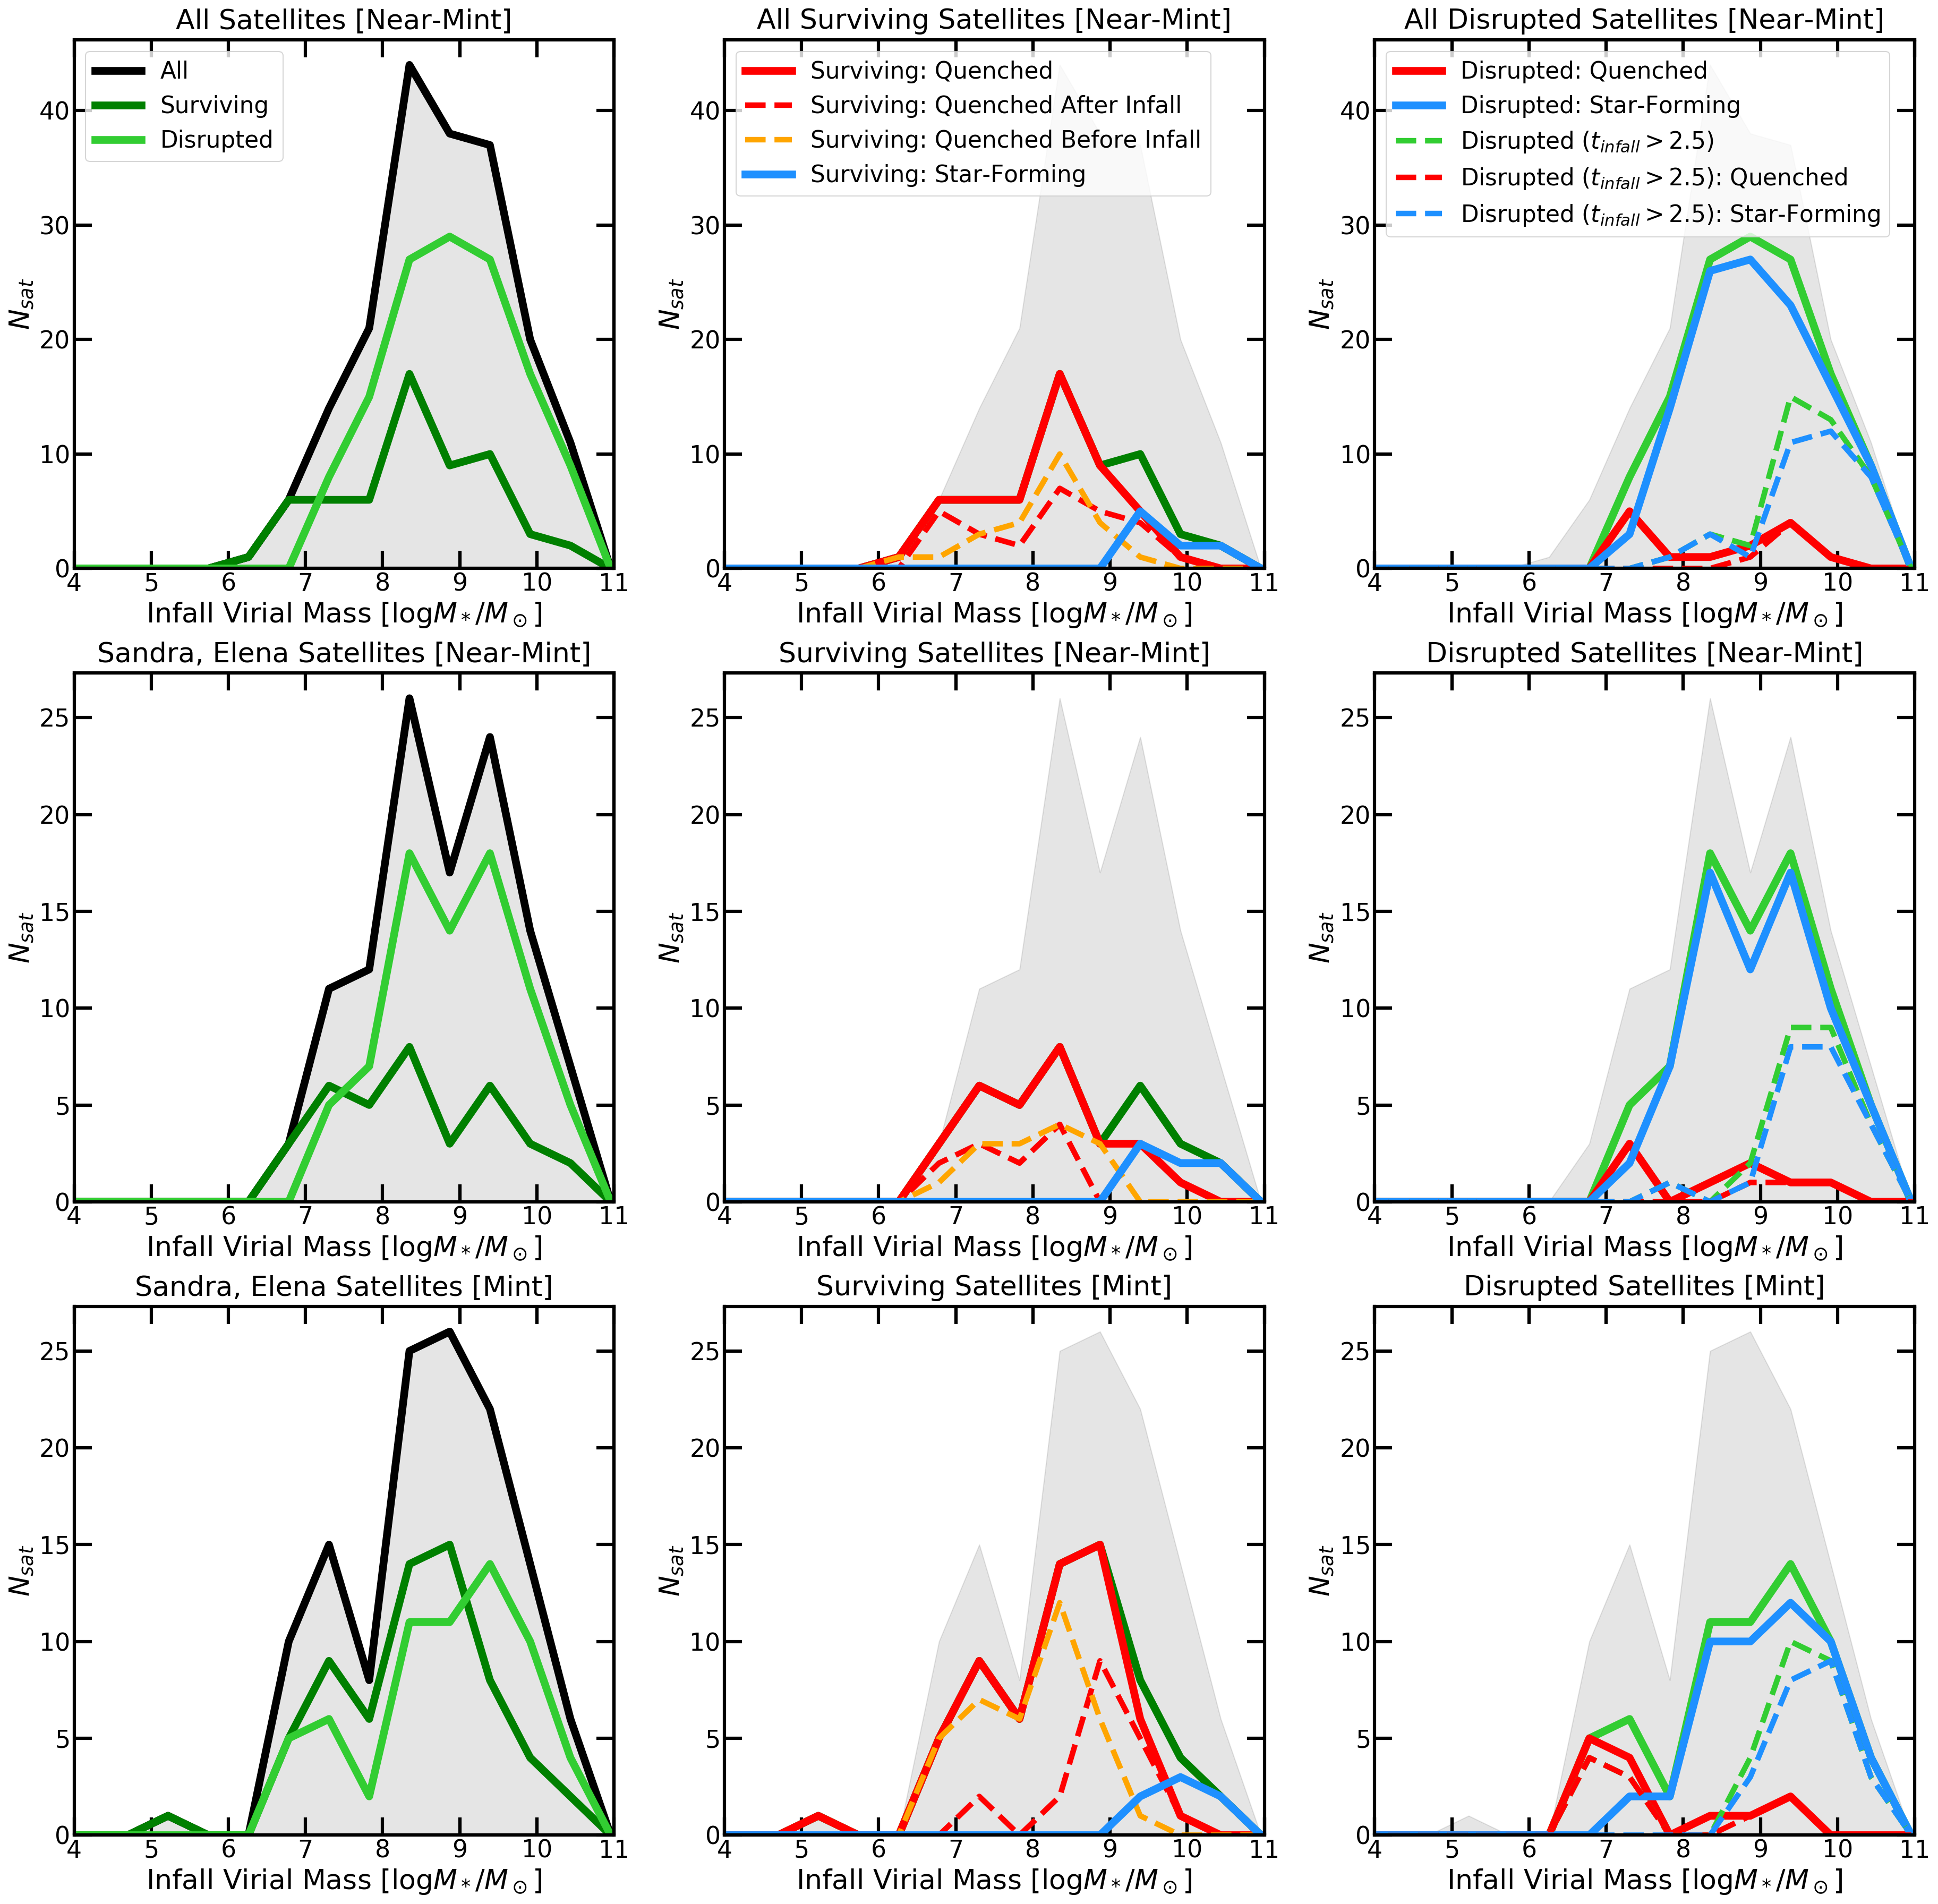

In [2]:
data = pd.read_csv('Data100.csv')
myIDs = data['ID'].to_numpy()

status = data['Status'].to_numpy()
simulation = data['Simulation'].to_numpy()
M_infall = np.log10(data['infall_virial_mass'].to_numpy())
t_quench = data['time_quench'].to_numpy()
t_infall = data['time_infall'].to_numpy()


norm = len(status)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='none', sharey='none', figsize=(25, 24))
fig.set_facecolor('w')
np.seterr(divide='ignore')
fig.set_dpi(150)
# Increase weight of axes
plt.setp(ax1.spines.values(), linewidth=3)
plt.setp(ax2.spines.values(), linewidth=3)
plt.setp(ax3.spines.values(), linewidth=3)
plt.setp(ax4.spines.values(), linewidth=3)
plt.setp(ax5.spines.values(), linewidth=3)
plt.setp(ax6.spines.values(), linewidth=3)
plt.setp(ax7.spines.values(), linewidth=3)
plt.setp(ax8.spines.values(), linewidth=3)
plt.setp(ax9.spines.values(), linewidth=3)
linx=np.linspace(0, 12, 24)
# Survivors


A, B = np.histogram(M_infall, linx)
ax1.fill_between(B[:-1], A, color='black', alpha=0.1)
ax1.plot(B[:-1], A, color='black', lw=7, label='All')
A, B = np.histogram(M_infall[status=='Survivor'], linx)
ax1.plot(B[:-1], A, color='green',  lw=7, label='Surviving')
A, B = np.histogram(M_infall[status=='Zombie'], linx)
ax1.plot(B[:-1], A, color='limegreen',  lw=7, label='Disrupted')
ax1.set_xlim(4, 11)
ax1.set_ylim(0, )
ax1.legend(loc='upper left', fontsize=21, frameon=True)
ax1.tick_params(which='major', length=16, width=3, labelsize=15)
ax1.tick_params(which='minor', length=8, width=2, labelsize=15)
ax1.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax1.set_title('All Satellites [Near-Mint]', fontsize=25, pad=10)
ax1.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax1.set_ylabel('$N_{sat}$', fontsize=25)


A, B = np.histogram(M_infall, linx)
ax2.fill_between(B[:-1], A, color='black', alpha=0.1)
A, B = np.histogram(M_infall[status=='Survivor'], linx)
ax2.plot(B[:-1], A, color='green',  lw=7)
A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>0)], linx)
ax2.plot(B[:-1], A, color='red',  lw=7, label='Surviving: Quenched')

A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>=t_infall)], linx)
ax2.plot(B[:-1], A, color='red',  ls='--', lw=5, label='Surviving: Quenched After Infall')
A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>0) & (t_quench<t_infall)], linx)
ax2.plot(B[:-1], A, color='orange',  ls='--', lw=5, label='Surviving: Quenched Before Infall')

A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench<=0)], linx)
ax2.plot(B[:-1], A, color='dodgerblue',  lw=7, label='Surviving: Star-Forming')
ax2.set_xlim(4, 11)
ax2.set_ylim(0, )
ax2.legend(loc='upper left', fontsize=21, frameon=True)
ax2.tick_params(which='major', length=16, width=3, labelsize=15)
ax2.tick_params(which='minor', length=8, width=2, labelsize=15)
ax2.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax2.set_title('All Surviving Satellites [Near-Mint]', fontsize=25, pad=10)
ax2.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax2.set_ylabel('$N_{sat}$', fontsize=25)

A, B = np.histogram(M_infall, linx)
ax3.fill_between(B[:-1], A, color='black', alpha=0.1)
A, B = np.histogram(M_infall[status=='Zombie'], linx)
ax3.plot(B[:-1], A, color='limegreen',  lw=7)
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench>0)], linx)
ax3.plot(B[:-1], A, color='red',  lw=7, label='Disrupted: Quenched')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench<=0)], linx)
ax3.plot(B[:-1], A, color='dodgerblue',  lw=7, label='Disrupted: Star-Forming')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_infall>=2.5)], linx)
ax3.plot(B[:-1], A, color='limegreen',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$)')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench>0) & (t_infall>=2.5)], linx)
ax3.plot(B[:-1], A, color='red',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$): Quenched')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench<=0) & (t_infall>=2.5)], linx)
ax3.plot(B[:-1], A, color='dodgerblue',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$): Star-Forming')

ax3.set_xlim(4, 11)
ax3.set_ylim(0, )
ax3.legend(loc='upper left', fontsize=21, frameon=True)
ax3.tick_params(which='major', length=16, width=3, labelsize=15)
ax3.tick_params(which='minor', length=8, width=2, labelsize=15)
ax3.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax3.set_title('All Disrupted Satellites [Near-Mint]', fontsize=25, pad=10)
ax3.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax3.set_ylabel('$N_{sat}$', fontsize=25)

#-----------------------------------------------------------------------------------#


status = status[(simulation!='h242') & (simulation!='h229')]
# simulation = data['Simulation'].to_numpy()
M_infall = M_infall[(simulation!='h242') & (simulation!='h229')]
t_quench = t_quench[(simulation!='h242') & (simulation!='h229')]
t_infall = t_infall[(simulation!='h242') & (simulation!='h229')]

norm = len(status)


# Survivors


A, B = np.histogram(M_infall, linx)
ax4.fill_between(B[:-1], A, color='black', alpha=0.1)
ax4.plot(B[:-1], A, color='black', lw=7, label='All')
A, B = np.histogram(M_infall[status=='Survivor'], linx)
ax4.plot(B[:-1], A, color='green',  lw=7, label='Surviving')
A, B = np.histogram(M_infall[status=='Zombie'], linx)
ax4.plot(B[:-1], A, color='limegreen',  lw=7, label='Disrupted')
ax4.set_xlim(4, 11)
ax4.set_ylim(0, )
# ax4.legend(loc='upper left', fontsize=21, frameon=True)
ax4.tick_params(which='major', length=16, width=3, labelsize=15)
ax4.tick_params(which='minor', length=8, width=2, labelsize=15)
ax4.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax4.set_title('Sandra, Elena Satellites [Near-Mint]', fontsize=25, pad=10)
ax4.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax4.set_ylabel('$N_{sat}$', fontsize=25)


A, B = np.histogram(M_infall, linx)
ax5.fill_between(B[:-1], A, color='black', alpha=0.1)
A, B = np.histogram(M_infall[status=='Survivor'], linx)
ax5.plot(B[:-1], A, color='green',  lw=7)
A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>0)], linx)
ax5.plot(B[:-1], A, color='red',  lw=7, label='Surviving: Quenched')

A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>=t_infall)], linx)
ax5.plot(B[:-1], A, color='red',  ls='--', lw=5, label='Surviving: Quenched After Infall')
A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>0) & (t_quench<t_infall)], linx)
ax5.plot(B[:-1], A, color='orange',  ls='--', lw=5, label='Surviving: Quenched Before Infall')

A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench<=0)], linx)
ax5.plot(B[:-1], A, color='dodgerblue',  lw=7, label='Surviving: Star-Forming')
ax5.set_xlim(4, 11)
ax5.set_ylim(0, )
# ax5.legend(loc='upper left', fontsize=21, frameon=True)
ax5.tick_params(which='major', length=16, width=3, labelsize=15)
ax5.tick_params(which='minor', length=8, width=2, labelsize=15)
ax5.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax5.set_title('Surviving Satellites [Near-Mint]', fontsize=25, pad=10)
ax5.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax5.set_ylabel('$N_{sat}$', fontsize=25)

A, B = np.histogram(M_infall, linx)
ax6.fill_between(B[:-1], A, color='black', alpha=0.1)
A, B = np.histogram(M_infall[status=='Zombie'], linx)
ax6.plot(B[:-1], A, color='limegreen',  lw=7)
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench>0)], linx)
ax6.plot(B[:-1], A, color='red',  lw=7, label='Disrupted: Quenched')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench<=0)], linx)
ax6.plot(B[:-1], A, color='dodgerblue',  lw=7, label='Disrupted: Star-Forming')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_infall>=2.5)], linx)
ax6.plot(B[:-1], A, color='limegreen',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$)')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench>0) & (t_infall>=2.5)], linx)
ax6.plot(B[:-1], A, color='red',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$): Quenched')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench<=0) & (t_infall>=2.5)], linx)
ax6.plot(B[:-1], A, color='dodgerblue',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$): Star-Forming')

ax6.set_xlim(4, 11)
ax6.set_ylim(0, )
# ax6.legend(loc='upper left', fontsize=21, frameon=True)
ax6.tick_params(which='major', length=16, width=3, labelsize=15)
ax6.tick_params(which='minor', length=8, width=2, labelsize=15)
ax6.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax6.set_title('Disrupted Satellites [Near-Mint]', fontsize=25, pad=10)
ax6.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax6.set_ylabel('$N_{sat}$', fontsize=25)

#--------------------------------------------------------------------------------------------

data = pd.read_csv('Mint_Data/Data100.csv')
myIDs = data['ID'].to_numpy()

status = data['near_mint_status'].to_numpy()
simulation = data['Simulation'].to_numpy()
M_infall = np.log10(data['infall_virial_mass'].to_numpy())
t_quench = data['time_quench'].to_numpy()
t_infall = data['time_infall'].to_numpy()

norm = len(status[status!='Unborn'])

# Survivors


A, B = np.histogram(M_infall[status!='Unborn'], linx)
ax7.fill_between(B[:-1], A, color='black', alpha=0.1)
ax7.plot(B[:-1], A, color='black', lw=7, label='All')
A, B = np.histogram(M_infall[status=='Survivor'], linx)
ax7.plot(B[:-1], A, color='green',  lw=7, label='Surviving')
A, B = np.histogram(M_infall[status=='Zombie'], linx)
ax7.plot(B[:-1], A, color='limegreen',  lw=7, label='Disrupted')
ax7.set_xlim(4, 11)
ax7.set_ylim(0, )
# ax7.legend(loc='upper left', fontsize=21, frameon=True)
ax7.tick_params(which='major', length=16, width=3, labelsize=15)
ax7.tick_params(which='minor', length=8, width=2, labelsize=15)
ax7.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax7.set_title('Sandra, Elena Satellites [Mint]', fontsize=25, pad=10)
ax7.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax7.set_ylabel('$N_{sat}$', fontsize=25)


A, B = np.histogram(M_infall[status!='Unborn'], linx)
ax8.fill_between(B[:-1], A, color='black', alpha=0.1)
A, B = np.histogram(M_infall[status=='Survivor'], linx)
ax8.plot(B[:-1], A, color='green',  lw=7)
A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>0)], linx)
ax8.plot(B[:-1], A, color='red',  lw=7, label='Surviving: Quenched')

A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>=t_infall)], linx)
ax8.plot(B[:-1], A, color='red',  ls='--', lw=5, label='Surviving: Quenched After Infall')
A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench>0) & (t_quench<t_infall)], linx)
ax8.plot(B[:-1], A, color='orange',  ls='--', lw=5, label='Surviving: Quenched Before Infall')

A, B = np.histogram(M_infall[(status=='Survivor') & (t_quench<=0)], linx)
ax8.plot(B[:-1], A, color='dodgerblue',  lw=7, label='Surviving: Star-Forming')
ax8.set_xlim(4, 11)
ax8.set_ylim(0, )
# ax8.legend(loc='upper left', fontsize=21, frameon=True)
ax8.tick_params(which='major', length=16, width=3, labelsize=15)
ax8.tick_params(which='minor', length=8, width=2, labelsize=15)
ax8.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax8.set_title('Surviving Satellites [Mint]', fontsize=25, pad=10)
ax8.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax8.set_ylabel('$N_{sat}$', fontsize=25)

A, B = np.histogram(M_infall[status!='Unborn'], linx)
ax9.fill_between(B[:-1], A, color='black', alpha=0.1)
A, B = np.histogram(M_infall[status=='Zombie'], linx)
ax9.plot(B[:-1], A, color='limegreen',  lw=7)
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench>0)], linx)
ax9.plot(B[:-1], A, color='red',  lw=7, label='Disrupted: Quenched')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench<=0)], linx)
ax9.plot(B[:-1], A, color='dodgerblue',  lw=7, label='Disrupted: Star-Forming')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_infall>=2.5)], linx)
ax9.plot(B[:-1], A, color='limegreen',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$)')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench>0) & (t_infall>=2.5)], linx)
ax9.plot(B[:-1], A, color='red',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$): Quenched')
A, B = np.histogram(M_infall[(status=='Zombie') & (t_quench<=0) & (t_infall>=2.5)], linx)
ax9.plot(B[:-1], A, color='dodgerblue',  lw=5, ls='--', label='Disrupted ($t_{infall} > 2.5$): Star-Forming')

ax9.set_xlim(4, 11)
ax9.set_ylim(0, )
# ax9.legend(loc='upper left', fontsize=21, frameon=True)
ax9.tick_params(which='major', length=16, width=3, labelsize=15)
ax9.tick_params(which='minor', length=8, width=2, labelsize=15)
ax9.tick_params(direction='in', which='both', labelsize=22, bottom=True, top=True, left=True, right=True)
ax9.set_title('Disrupted Satellites [Mint]', fontsize=25, pad=10)
ax9.set_xlabel('Infall Virial Mass [$\log M_*/M_\odot$]', fontsize=25)
ax9.set_ylabel('$N_{sat}$', fontsize=25)

#-----------------------------------------------------------------------------------#
fig.tight_layout()

In [13]:
data = pd.read_csv('Data100.csv')
data

ID Simulation    Status   infall_mass  time_infall  \
0      148409610       h148  Survivor  2.334786e+07        8.198   
1    14840961090       h148  Survivor  2.256329e+03        6.474   
2    14840961101       h148  Survivor  4.742965e+04        8.609   
3      148409612       h148  Survivor  2.334786e+07        8.198   
4    14840961292       h148  Survivor  2.799243e+05        3.888   
5      148409613       h148  Survivor  5.701916e+06       13.801   
6     1484096189       h148  Survivor  1.002513e+05        5.868   
7       14840962       h148  Survivor  9.235279e+08       12.939   
8     1484096217       h148  Survivor  5.952006e+06       13.801   
9     1484096223       h148  Survivor  9.775943e+05       10.767   
10   14840962297       h148  Survivor  1.852220e+05       13.370   
11     148409623       h148  Survivor  2.031511e+07        6.474   
12    1484096263       h148  Survivor  5.194838e+05       13.801   
13    1484096290       h148  Survivor  2.071054e+06        4.750   
14      14840963       h148  Survivor  5.253622e+08        9.922   
15    1484096306       h148  Survivor  6.767896e+03       13.370   
16     148409636       h148  Survivor  5.833904e+04       12.508   
17    1484096380       h148  Survivor  1.128490e+04       13.801   
18     148409639       h148  Survivor  5.941434e+06        7.767   
19      14840964       h148  Survivor  1.808522e+08       12.077   
20    1484096438       h148  Survivor  1.122601e+05        4.750   
21     148409644       h148  Survivor  4.511919e+03       13.370   
22     148409648       h148  Survivor  7.569845e+05        8.609   
23    1484096563       h148  Survivor  5.498581e+04        9.491   
24     148409662       h148  Survivor  1.585696e+07        6.474   
25     148409669       h148  Survivor  6.767848e+03       13.801   
26    1484096779       h148  Survivor  2.256065e+03       10.353   
27    1484096932       h148  Survivor  1.355226e+04        8.198   
28    1480225104       h148    Zombie  1.508419e+04        0.767   
29     148027562       h148    Zombie  5.689969e+05        0.935   
30    1480275869       h148    Zombie  2.704475e+03        0.935   
31    1480347728       h148    Zombie  5.386700e+04        1.178   
32      14803478       h148    Zombie  9.552982e+06        1.178   
33    1480384109       h148    Zombie  2.555477e+05        1.178   
34    1480384115       h148    Zombie  1.738862e+06        1.302   
35    1480384124       h148    Zombie  1.400930e+05        1.302   
36    1480384163       h148    Zombie  4.698190e+04        1.302   
37      14803846       h148    Zombie  1.615081e+07        1.302   
38    1480384990       h148    Zombie  5.392318e+03        1.178   
39    1480456173       h148    Zombie  2.555477e+05        1.178   
40    1480456309       h148    Zombie  4.213978e+06        1.545   
41     148045663       h148    Zombie  7.990625e+06        1.545   
42    1480512264       h148    Zombie  1.113418e+05        1.545   
43      14805124       h148    Zombie  6.337417e+07        1.733   
44     148051272       h148    Zombie  9.076088e+05        1.733   
45     148051285       h148    Zombie  5.688105e+05        1.733   
46     148051289       h148    Zombie  4.237914e+05        1.733   
47     148064011       h148    Zombie  1.761775e+08        2.164   
48      14807012       h148    Zombie  3.455766e+08        2.370   
49     148070125       h148    Zombie  4.064119e+07        2.164   
50     148070149       h148    Zombie  7.072350e+06        2.370   
51     148070165       h148    Zombie  5.434200e+06        2.370   
52     148089619       h148    Zombie  1.358614e+07        2.925   
53     148097431       h148    Zombie  1.156641e+07        3.289   
54     148102421       h148    Zombie  5.897275e+07        2.925   
55     148102429       h148    Zombie  7.062523e+06        3.457   
56      14810249       h148    Zombie  1.142823e+08        3.457   
57      14811066       h148    Zombie  2.267050e+08        3.733   
58

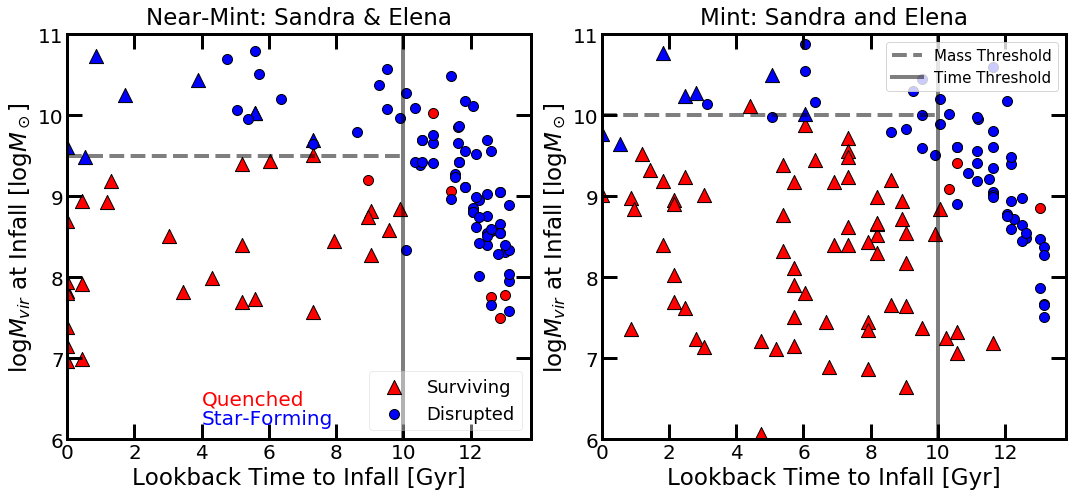

In [31]:
data = pd.read_csv('Data100.csv')
myIDs = data['ID'].to_numpy()

simulation = data['Simulation'].to_numpy()
status = data['Status'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
M_infall = np.log10(data['infall_virial_mass'].to_numpy())[(simulation!='h229') & (simulation!='h242')]
t_quench = data['time_quench'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
t_infall = data['time_infall'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
M_ratio_infall = data['infall_mass_ratio'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
lookback_t_infall = 13.8 - t_infall

fig, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(15, 7))
# (ax1, ax2) = ax
fig.set_facecolor('w')
# fig.set_dpi(150.0)
np.seterr(divide='ignore')

linx=np.linspace(0, 10, 100)
cm = plt.cm.get_cmap('viridis')
# Increase weight of axes
plt.setp(ax1.spines.values(), linewidth=3)
plt.setp(ax2.spines.values(), linewidth=3)
# fig.set_dpi(150)
x = lookback_t_infall
y = M_infall

ax1.fill_between(linx, [1e-2]*len(linx), [1e-4]*len(linx), alpha=0.3, color='lightgreen')
# the scatter plot:
ax1.scatter(x[(status=='Survivor')&(t_quench>=0)], y[(status=='Survivor')&(t_quench>=0)], s=200, 
                   color='red', marker='^', edgecolors="black", linewidth=1, alpha=1, label = 'Surviving')
ax1.scatter(x[(status=='Survivor')&(t_quench<0)], y[(status=='Survivor')&(t_quench<0)], s=200,  
                   color='blue', marker='^', edgecolors="black", linewidth=1, alpha=1)
ax1.scatter(x[(status=='Zombie')&(t_quench>=0)], y[(status=='Zombie')&(t_quench>=0)], s=100, 
                   color='red', edgecolors='black', facecolors='red', linewidth=1, alpha=1)
ax1.scatter(x[(status=='Zombie')&(t_quench<0)], y[(status=='Zombie')&(t_quench<0)], s=100, 
                   color='blue', edgecolors='black', facecolors='blue', linewidth=1, alpha=1, label = 'Disrupted')
ax1.text(4, 6.5, 'Quenched', horizontalalignment='left', verticalalignment='center',
         fontsize=20, color='red')
ax1.text(4, 6.25, 'Star-Forming', horizontalalignment='left', verticalalignment='center',
         fontsize=20, color='blue')
ax1.set_xlim(0, 13.8)
ax1.set_ylim(6, 11)
# ax1.set_yscale('log')
ax1.axhline(9.5, xmin=0, xmax=10/13.8, lw=4, c='k', alpha=0.5, ls='--')
ax1.axvline(10, lw=4, c='k', alpha=0.5, ls='-')
ax1.legend(loc='lower right', fontsize=18, frameon=True, framealpha=0.4)
ax1.tick_params(which='major', length=15, width=3, labelsize=15)
ax1.tick_params(which='minor', length=8, width=2, labelsize=15)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)
ax1.set_title('Near-Mint: Sandra & Elena', fontsize=23, pad=10)
ax1.set_xlabel('Lookback Time to Infall [Gyr]', fontsize=23)
ax1.set_ylabel('$\log M_{vir}$ at Infall [$\log M_\odot$]', fontsize=23)


#----------------------------------------------------------------------------------------------

data = pd.read_csv('Mint_Data/Data100.csv')
myIDs = data['ID'].to_numpy()

status = data['Status'].to_numpy()
simulation = data['Simulation'].to_numpy()
M_infall = np.log10(data['infall_virial_mass'].to_numpy())
t_quench = data['time_quench'].to_numpy()
t_infall = data['time_infall'].to_numpy()
M_ratio_infall = data['infall_mass_ratio'].to_numpy()
lookback_t_infall = 13.8 - t_infall

x = lookback_t_infall
y = M_infall

ax2.fill_between(linx, [1e-2]*len(linx), [1e-4]*len(linx), alpha=0.3, color='lightgreen')
# the scatter plot:
ax2.scatter(x[(status=='Survivor')&(t_quench>=0)], y[(status=='Survivor')&(t_quench>=0)], s=200, 
                   color='red', marker='^', edgecolors="black", linewidth=1, alpha=1)
ax2.scatter(x[(status=='Survivor')&(t_quench<0)], y[(status=='Survivor')&(t_quench<0)], s=200,  
                   color='blue', marker='^', edgecolors="black", linewidth=1, alpha=1)
ax2.scatter(x[(status=='Zombie')&(t_quench>=0)], y[(status=='Zombie')&(t_quench>=0)], s=100, 
                   color='red', edgecolors='black', facecolors='red', linewidth=1, alpha=1)
ax2.scatter(x[(status=='Zombie')&(t_quench<0)], y[(status=='Zombie')&(t_quench<0)], s=100, 
                   color='blue', edgecolors='black', facecolors='blue', linewidth=1, alpha=1)
# ax2.text(9, 1.5e-6, 'Quenched', horizontalalignment='left', verticalalignment='center',
#          fontsize=20, color='red')
# ax2.text(7, 6.5, '[Near-Mint Disruption]', horizontalalignment='left', verticalalignment='center',
#          fontsize=18, color='black')
ax2.set_xlim(0, 13.8)
ax2.set_ylim(6, 11)
# ax1.set_yscale('log')
ax2.axhline(10, xmin=0, xmax=10/13.8, lw=4, c='k', alpha=0.5, ls='--', label='Mass Threshold')
ax2.axvline(10, lw=4, c='k', alpha=0.5, ls='-', label='Time Threshold')
ax2.legend(loc='upper right', fontsize=15, frameon=True, framealpha=0.8)
ax2.tick_params(which='major', length=15, width=3, labelsize=15)
ax2.tick_params(which='minor', length=8, width=2, labelsize=15)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)
ax2.set_title('Mint: Sandra and Elena', fontsize=23, pad=10)
ax2.set_xlabel('Lookback Time to Infall [Gyr]', fontsize=23)
ax2.set_ylabel('$\log M_{vir}$ at Infall [$\log M_\odot$]', fontsize=23)

fig.tight_layout()

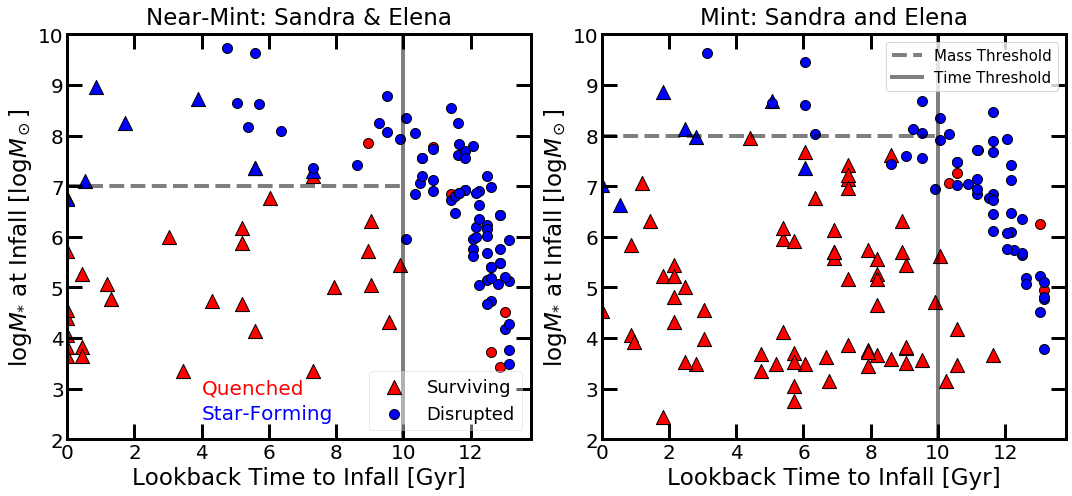

In [24]:
data = pd.read_csv('Data100.csv')
myIDs = data['ID'].to_numpy()

simulation = data['Simulation'].to_numpy()
status = data['Status'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
M_infall = np.log10(data['infall_mass'].to_numpy())[(simulation!='h229') & (simulation!='h242')]
t_quench = data['time_quench'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
t_infall = data['time_infall'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
M_ratio_infall = data['infall_mass_ratio'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
lookback_t_infall = 13.8 - t_infall

fig, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(15, 7))
# (ax1, ax2) = ax
fig.set_facecolor('w')
# fig.set_dpi(150.0)
np.seterr(divide='ignore')

linx=np.linspace(0, 10, 100)
cm = plt.cm.get_cmap('viridis')
# Increase weight of axes
plt.setp(ax1.spines.values(), linewidth=3)
plt.setp(ax2.spines.values(), linewidth=3)
# fig.set_dpi(150)
x = lookback_t_infall
y = M_infall

ax1.fill_between(linx, [1e-2]*len(linx), [1e-4]*len(linx), alpha=0.3, color='lightgreen')
# the scatter plot:
ax1.scatter(x[(status=='Survivor')&(t_quench>=0)], y[(status=='Survivor')&(t_quench>=0)], s=200, 
                   color='red', marker='^', edgecolors="black", linewidth=1, alpha=1, label = 'Surviving')
ax1.scatter(x[(status=='Survivor')&(t_quench<0)], y[(status=='Survivor')&(t_quench<0)], s=200,  
                   color='blue', marker='^', edgecolors="black", linewidth=1, alpha=1)
ax1.scatter(x[(status=='Zombie')&(t_quench>=0)], y[(status=='Zombie')&(t_quench>=0)], s=100, 
                   color='red', edgecolors='black', facecolors='red', linewidth=1, alpha=1)
ax1.scatter(x[(status=='Zombie')&(t_quench<0)], y[(status=='Zombie')&(t_quench<0)], s=100, 
                   color='blue', edgecolors='black', facecolors='blue', linewidth=1, alpha=1, label = 'Disrupted')
ax1.text(4, 3, 'Quenched', horizontalalignment='left', verticalalignment='center',
         fontsize=20, color='red')
ax1.text(4, 2.5, 'Star-Forming', horizontalalignment='left', verticalalignment='center',
         fontsize=20, color='blue')
ax1.set_xlim(0, 13.8)
ax1.set_ylim(2, 10)
# ax1.set_yscale('log')
ax1.axhline(7, xmin=0, xmax=10/13.8, lw=4, c='k', alpha=0.5, ls='--')
ax1.axvline(10, lw=4, c='k', alpha=0.5, ls='-')
ax1.legend(loc='lower right', fontsize=18, frameon=True, framealpha=0.4)
ax1.tick_params(which='major', length=15, width=3, labelsize=15)
ax1.tick_params(which='minor', length=8, width=2, labelsize=15)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)
ax1.set_title('Near-Mint: Sandra & Elena', fontsize=23, pad=10)
ax1.set_xlabel('Lookback Time to Infall [Gyr]', fontsize=23)
ax1.set_ylabel('$\log M_{*}$ at Infall [$\log M_\odot$]', fontsize=23)


#----------------------------------------------------------------------------------------------

data = pd.read_csv('Mint_Data/Data100.csv')
myIDs = data['ID'].to_numpy()

status = data['Status'].to_numpy()
simulation = data['Simulation'].to_numpy()
M_infall = np.log10(data['infall_mass'].to_numpy())
t_quench = data['time_quench'].to_numpy()
t_infall = data['time_infall'].to_numpy()
M_ratio_infall = data['infall_mass_ratio'].to_numpy()
lookback_t_infall = 13.8 - t_infall

x = lookback_t_infall
y = M_infall

ax2.fill_between(linx, [1e-2]*len(linx), [1e-4]*len(linx), alpha=0.3, color='lightgreen')
# the scatter plot:
ax2.scatter(x[(status=='Survivor')&(t_quench>=0)], y[(status=='Survivor')&(t_quench>=0)], s=200, 
                   color='red', marker='^', edgecolors="black", linewidth=1, alpha=1)
ax2.scatter(x[(status=='Survivor')&(t_quench<0)], y[(status=='Survivor')&(t_quench<0)], s=200,  
                   color='blue', marker='^', edgecolors="black", linewidth=1, alpha=1)
ax2.scatter(x[(status=='Zombie')&(t_quench>=0)], y[(status=='Zombie')&(t_quench>=0)], s=100, 
                   color='red', edgecolors='black', facecolors='red', linewidth=1, alpha=1)
ax2.scatter(x[(status=='Zombie')&(t_quench<0)], y[(status=='Zombie')&(t_quench<0)], s=100, 
                   color='blue', edgecolors='black', facecolors='blue', linewidth=1, alpha=1)
# ax2.text(9, 1.5e-6, 'Quenched', horizontalalignment='left', verticalalignment='center',
#          fontsize=20, color='red')
# ax2.text(7, 6.5, '[Near-Mint Disruption]', horizontalalignment='left', verticalalignment='center',
#          fontsize=18, color='black')
ax2.set_xlim(0, 13.8)
ax2.set_ylim(2, 10)
# ax1.set_yscale('log')
ax2.axhline(8, xmin=0, xmax=10/13.8, lw=4, c='k', alpha=0.5, ls='--', label='Mass Threshold')
ax2.axvline(10, lw=4, c='k', alpha=0.5, ls='-', label='Time Threshold')
ax2.legend(loc='upper right', fontsize=15, frameon=True, framealpha=0.8)
ax2.tick_params(which='major', length=15, width=3, labelsize=15)
ax2.tick_params(which='minor', length=8, width=2, labelsize=15)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)
ax2.set_title('Mint: Sandra and Elena', fontsize=23, pad=10)
ax2.set_xlabel('Lookback Time to Infall [Gyr]', fontsize=23)
ax2.set_ylabel('$\log M_{*}$ at Infall [$\log M_\odot$]', fontsize=23)

fig.tight_layout()

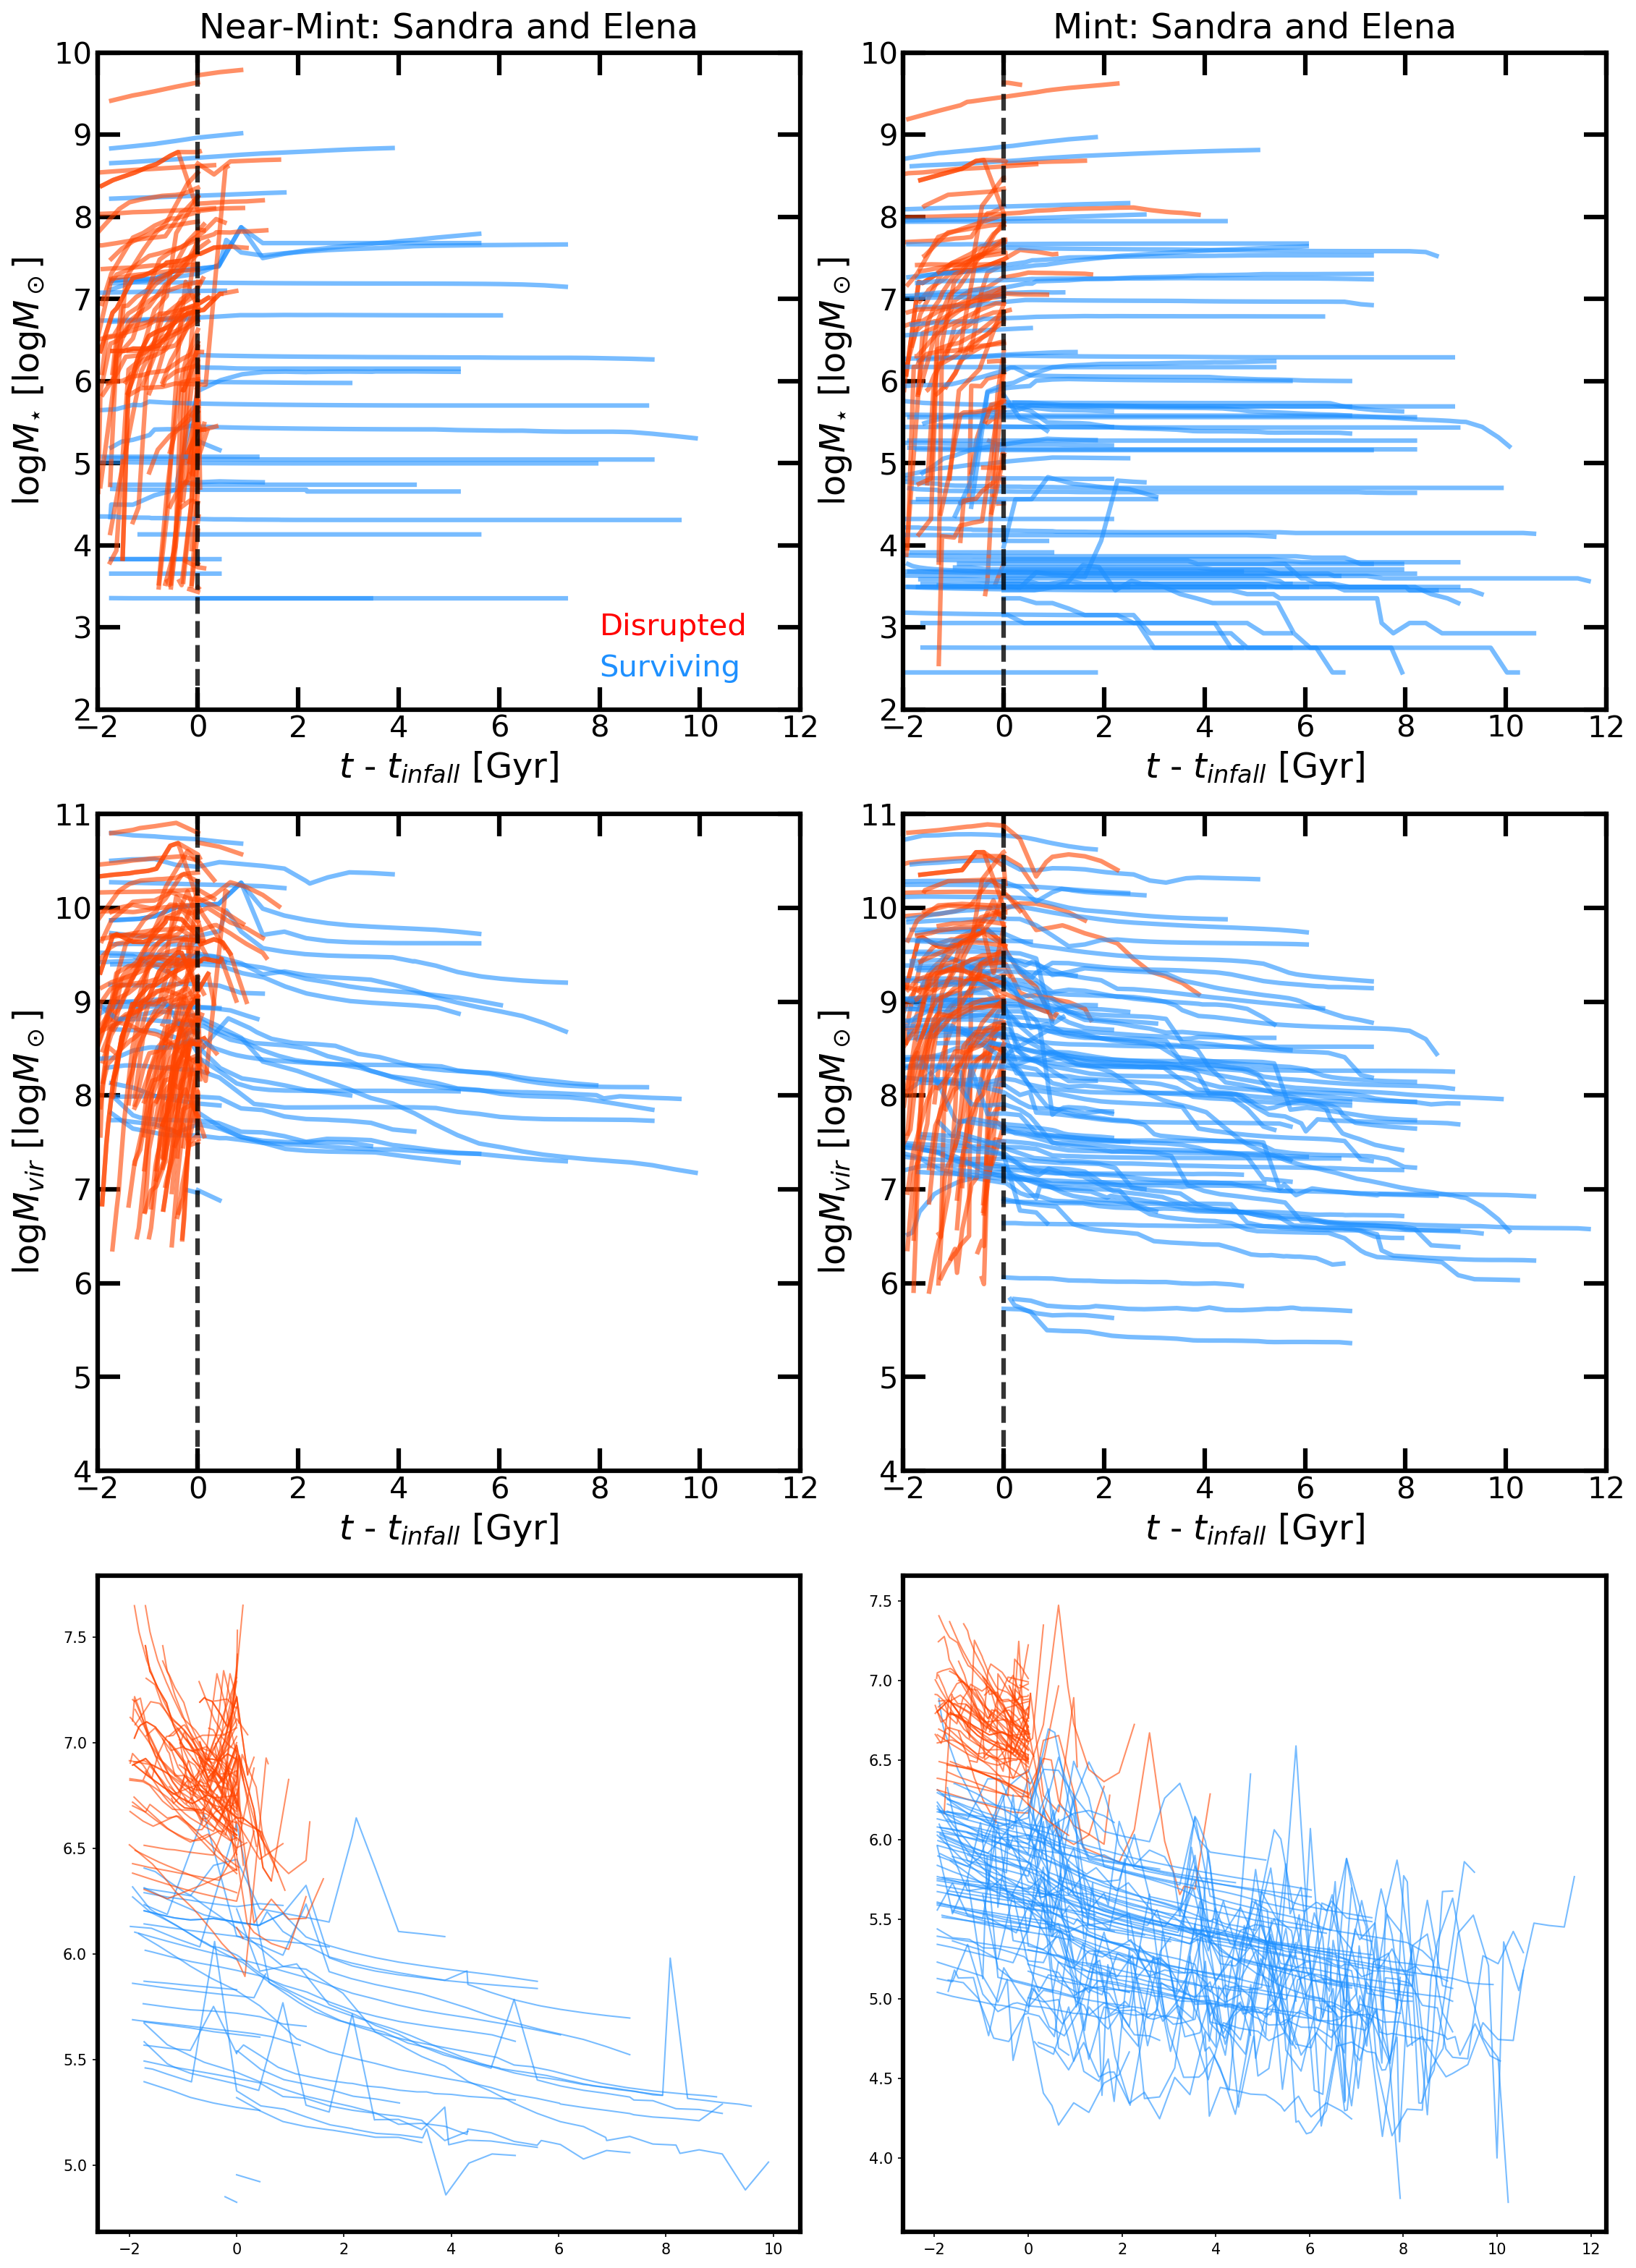

In [4]:
from tangos_halo_module.new import unique_tracks
np.seterr(divide='ignore')


data = pd.read_csv('Data100.csv')
simulation = data['Simulation'].to_numpy()
myIDs = data['ID'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
status = data['Status'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
M_infall = np.log10(data['infall_mass'].to_numpy())[(simulation!='h229') & (simulation!='h242')]
t_quench = data['time_quench'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
t_infall = data['time_infall'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
M_ratio_infall = data['infall_mass_ratio'].to_numpy()[(simulation!='h229') & (simulation!='h242')]
lookback_t_infall = 13.8 - t_infall

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='none', sharey='none', figsize=(15, 21))
fig.set_facecolor('w')
fig.set_dpi(150.0)
plt.setp(ax1.spines.values(), linewidth=3)
plt.setp(ax2.spines.values(), linewidth=3)
plt.setp(ax3.spines.values(), linewidth=3)
plt.setp(ax4.spines.values(), linewidth=3)
plt.setp(ax5.spines.values(), linewidth=3)
plt.setp(ax6.spines.values(), linewidth=3)

for i in range(0, len(myIDs)):
    t, Mstar = unique_tracks(ID=myIDs[i], key='M_star_|_Msol', resolution=100)
    t, Mvir = unique_tracks(ID=myIDs[i], key='Mvir_|_Msol', resolution=100)
    t, Rvir = unique_tracks(ID=myIDs[i], key='Rvir_|_kpc', resolution=100)
    t_in = t_infall[i]
    if status[i]=='Survivor':
        ax1.plot(t[t>t_in-2]-t_in, np.log10(Mstar)[t>t_in-2], c='dodgerblue', lw=3, alpha=0.6)
        ax3.plot(t[t>t_in-2]-t_in, np.log10(Mvir)[t>t_in-2], c='dodgerblue', lw=3, alpha=0.6)
        ax5.plot(t[t>t_in-2]-t_in, np.log10(Mvir/(np.pi*Rvir**2))[t>t_in-2], c='dodgerblue', lw=1, alpha=0.6)
    else:
        ax1.plot(t[t>t_in-2]-t_in, np.log10(Mstar)[t>t_in-2], c='orangered', lw=3, alpha=0.6)
        ax3.plot(t[t>t_in-2]-t_in, np.log10(Mvir)[t>t_in-2], c='orangered', lw=3, alpha=0.6)
        ax5.plot(t[t>t_in-2]-t_in, np.log10(Mvir/(np.pi*Rvir**2))[t>t_in-2], c='orangered', lw=1, alpha=0.6)
ax1.set_ylim(2, 10)
ax1.set_xlim(-2, 12)
ax1.axvline(0, lw=3, ls='--', c='k', alpha=0.8)
ax1.set_title('Near-Mint: Sandra and Elena', fontsize=23, pad=10)
ax1.set_xlabel('$t$ - $t_{infall}$ [Gyr]', fontsize=23)
ax1.set_ylabel('$\log M_{\star}$ [$\log M_\odot$]', fontsize=23)
ax1.tick_params(which='major', length=15, width=3, labelsize=15)
ax1.tick_params(which='minor', length=8, width=2, labelsize=15)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

ax1.text(8, 3, 'Disrupted', horizontalalignment='left', verticalalignment='center',
         fontsize=20, color='red')
ax1.text(8, 2.5, 'Surviving', horizontalalignment='left', verticalalignment='center',
         fontsize=20, color='dodgerblue')

ax3.set_ylim(4, 11)
ax3.set_xlim(-2, 12)
ax3.axvline(0, lw=3, ls='--', c='k', alpha=0.8)
# ax2.set_title('Mint: Sandra and Elena', fontsize=23, pad=10)
ax3.set_xlabel('$t$ - $t_{infall}$ [Gyr]', fontsize=23)
ax3.set_ylabel('$\log M_{vir}$ [$\log M_\odot$]', fontsize=23)
ax3.tick_params(which='major', length=15, width=3, labelsize=15)
ax3.tick_params(which='minor', length=8, width=2, labelsize=15)
ax3.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)
    
data = pd.read_csv('Mint_Data/Data100.csv')
myIDs = data['ID'].to_numpy()
M_infall = np.log10(data['infall_mass'].to_numpy())
t_quench = data['time_quench'].to_numpy()
t_infall = data['time_infall'].to_numpy()
t_disrupt = data['time_disruption'].to_numpy()
status = data['Status'].to_numpy()

for i in range(0, len(myIDs)):
    t, Mstar = unique_tracks(ID=myIDs[i], key='M_star_|_Msol', resolution='Mint')
    t, Mvir = unique_tracks(ID=myIDs[i], key='Mvir_|_Msol', resolution='Mint')
    t, Rvir = unique_tracks(ID=myIDs[i], key='Rvir_|_kpc', resolution='Mint')
    t_in = t_infall[i]
    if status[i]=='Survivor':
        ax2.plot(t[t>t_in-2]-t_in, np.log10(Mstar)[t>t_in-2], c='dodgerblue', lw=3, alpha=0.6)
        ax4.plot(t[t>t_in-2]-t_in, np.log10(Mvir)[t>t_in-2], c='dodgerblue', lw=3, alpha=0.6)
        ax6.plot(t[t>t_in-2]-t_in, np.log10(Mvir/(np.pi*Rvir**2))[t>t_in-2], c='dodgerblue', lw=1, alpha=0.6)
    else:
        ax2.plot(t[t>t_in-2]-t_in, np.log10(Mstar)[t>t_in-2], c='orangered', lw=3, alpha=0.6)
        ax4.plot(t[t>t_in-2]-t_in, np.log10(Mvir)[t>t_in-2], c='orangered', lw=3, alpha=0.6)
        ax6.plot(t[t>t_in-2]-t_in, np.log10(Mvir/(np.pi*Rvir**2))[t>t_in-2], c='orangered', lw=1, alpha=0.6)
ax2.set_ylim(2, 10)
ax2.set_xlim(-2, 12)
ax2.axvline(0, lw=3, ls='--', c='k', alpha=0.8)
ax2.set_title('Mint: Sandra and Elena', fontsize=23, pad=10)
ax2.set_xlabel('$t$ - $t_{infall}$ [Gyr]', fontsize=23)
ax2.set_ylabel('$\log M_{\star}$ [$\log M_\odot$]', fontsize=23)
ax2.tick_params(which='major', length=15, width=3, labelsize=15)
ax2.tick_params(which='minor', length=8, width=2, labelsize=15)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

ax4.set_ylim(4, 11)
ax4.set_xlim(-2, 12)
ax4.axvline(0, lw=3, ls='--', c='k', alpha=0.8)
# ax4.set_title('Mint: Sandra and Elena', fontsize=23, pad=10)
ax4.set_xlabel('$t$ - $t_{infall}$ [Gyr]', fontsize=23)
ax4.set_ylabel('$\log M_{vir}$ [$\log M_\odot$]', fontsize=23)
ax4.tick_params(which='major', length=15, width=3, labelsize=15)
ax4.tick_params(which='minor', length=8, width=2, labelsize=15)
ax4.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)
# Check Mvir: set_ylim(4, 12)
fig.tight_layout()

In [19]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

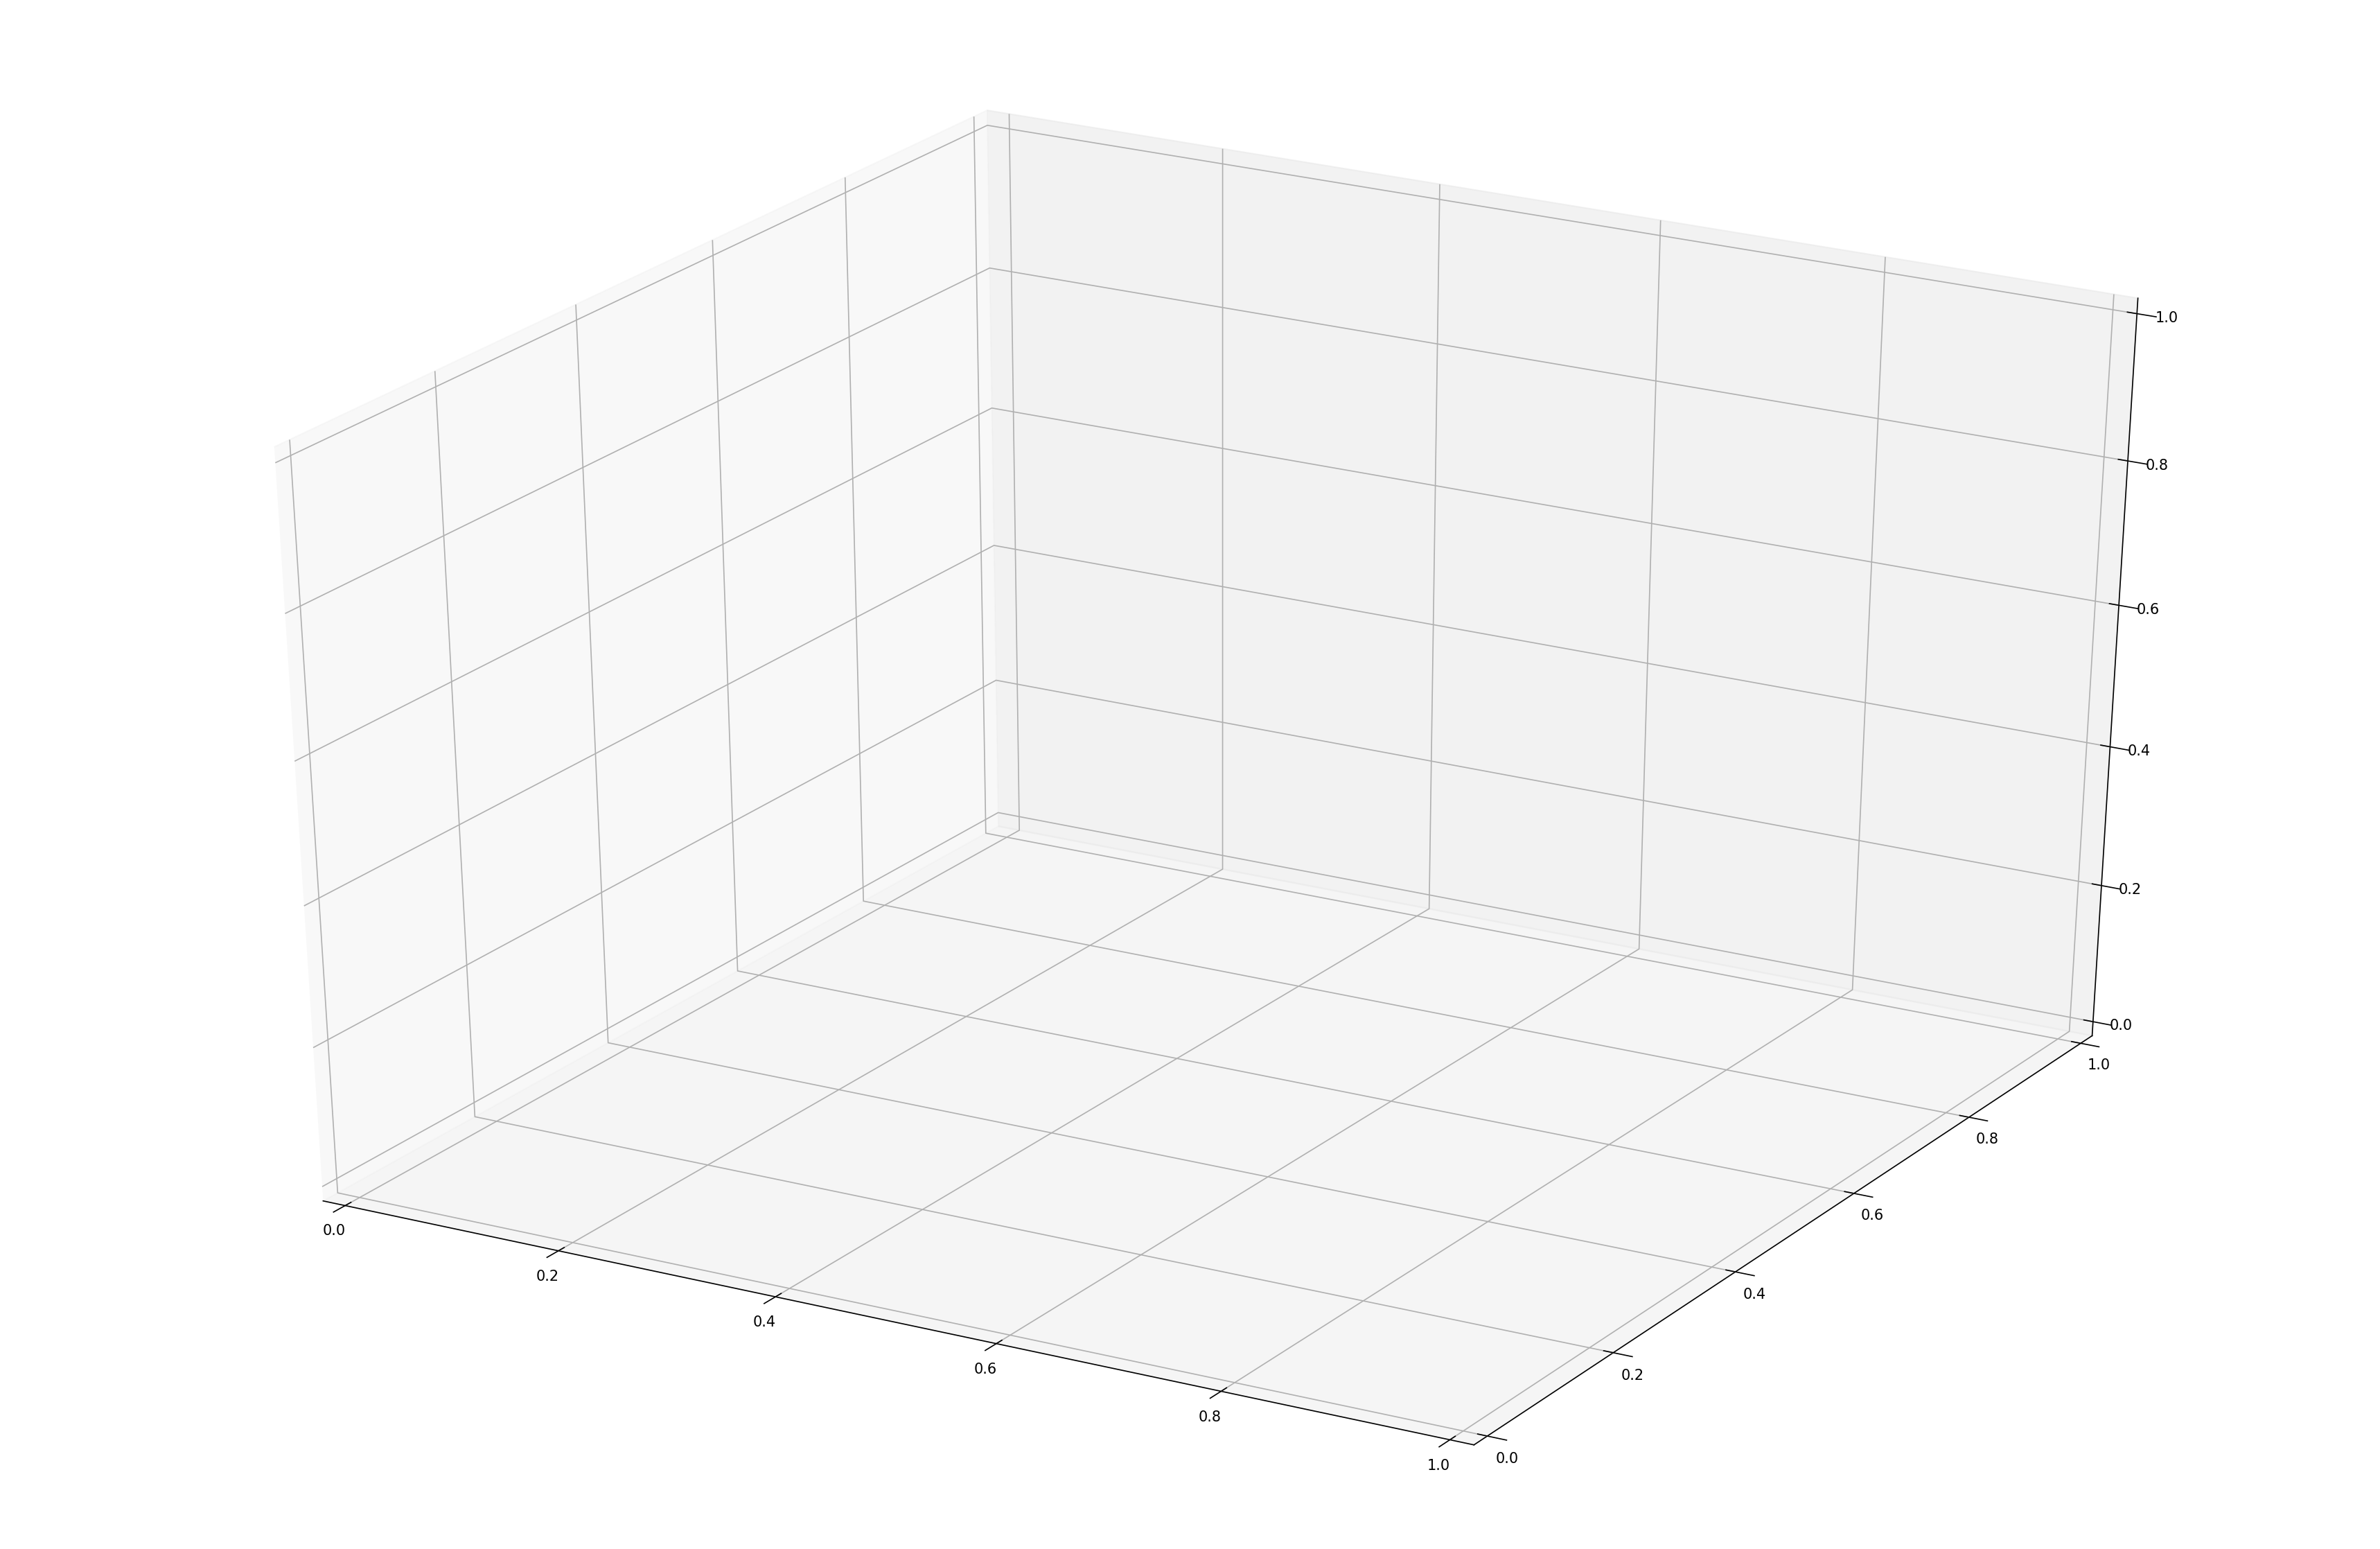

In [21]:
# %matplotlib notebook
data = pd.read_csv('Data100.csv')
ids = data['ID'].to_numpy()
infall_Mstar = data['infall_mass'].to_numpy()
plt.rcParams.update({'figure.max_open_warning': 0})
t_infall = data['time_infall'].to_numpy()
status = data['Status'].to_numpy()
sim = data['Simulation'].to_numpy()
# plt.figure(figsize=, facecolor='w')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(23, 15))
# fig = plt.figure(figsize=(30, 18))
fig.set_dpi(150)
fig.set_facecolor('w')
# plt.setp(ax1.spines.values(), linewidth=3)
# plt.setp(ax2.spines.values(), linewidth=3)
# plt.setp(ax3.spines.values(), linewidth=3)

# plt.setp(ax4.spines.values(), linewidth=3)
# plt.setp(ax5.spines.values(), linewidth=3)
# plt.setp(ax6.spines.values(), linewidth=3)
ax1 = fig.add_subplot(231, projection='3d')
ax2 = fig.add_subplot(232, projection='3d')
ax3 = fig.add_subplot(233, projection='3d')
ax4 = fig.add_subplot(234, projection='3d')
ax5 = fig.add_subplot(235, projection='3d')
ax6 = fig.add_subplot(236, projection='3d')
ax = plt.axes(projection='3d')

# colors = ['red', 'blue', 'black', 'orange', 'green', 'dodgerblue']
for idx in ids[(status=='Zombie') & (t_infall>=2.5)]:
    t_in=t_infall[ids==idx]
    s=sim[ids==idx]
    raw, (t, x, y, z, Rvir) = orbit_interpolation(ID=idx, resolution=100)
    # Data for a three-dimensional line
    if np.log10(infall_Mstar[ids==idx])<6:
        if s=='h148':
            ax1.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='red', alpha=0.8, lw=2)
        elif s=='h229':
            ax1.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='blue', alpha=0.8, lw=2)
        elif s=='h242':
            ax1.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='green', alpha=0.8, lw=2)
        elif s=='h329':
            ax1.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='black', alpha=0.8, lw=2)
    elif np.log10(infall_Mstar[ids==idx])>=6 and np.log10(infall_Mstar[ids==idx])<8:
        if s=='h148':
            ax2.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='red', alpha=0.8, lw=2)
        elif s=='h229':
            ax2.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='blue', alpha=0.8, lw=2)
        elif s=='h242':
            ax2.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='green', alpha=0.8, lw=2)
        elif s=='h329':
            ax2.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='black', alpha=0.8, lw=2)
    elif np.log10(infall_Mstar[ids==idx])>=8:
        if s=='h148':
            ax3.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='red', alpha=0.8, lw=2)
        elif s=='h229':
            ax3.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='blue', alpha=0.8, lw=2)
        elif s=='h242':
            ax3.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='green', alpha=0.8, lw=2)
        elif s=='h329':
            ax3.plot3D(x[t>=t_in-1], y[t>=t_in-1], z[t>=t_in-1], c='black', alpha=0.8, lw=2)
        
for idx in ids[(status=='Survivor')]:
    t_in=t_infall[ids==idx]
    s=sim[ids==idx]
    raw, (t, x, y, z, Rvir) = orbit_interpolation(ID=idx, resolution=100)
    # Data for a three-dimensional line
    if np.log10(infall_Mstar[ids==idx])<6:
        if s=='h148':
            ax4.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='red', alpha=0.8, lw=2)
        elif s=='h229':
            ax4.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='blue', alpha=0.8, lw=2)
        elif s=='h242':
            ax4.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='green', alpha=0.8, lw=2)
        elif s=='h329':
            ax4.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='black', alpha=0.8, lw=2)
    elif np.log10(infall_Mstar[ids==idx])>=6 and np.log10(infall_Mstar[ids==idx])<8:
        if s=='h148':
            ax5.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='red', alpha=0.8, lw=2)
        elif s=='h229':
            ax5.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='blue', alpha=0.8, lw=2)
        elif s=='h242':
            ax5.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='green', alpha=0.8, lw=2)
        elif s=='h329':
            ax5.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='black', alpha=0.8, lw=2)
    elif np.log10(infall_Mstar[ids==idx])>=8:
        if s=='h148':
            ax6.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='red', alpha=0.8, lw=2)
        elif s=='h229':
            ax6.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='blue', alpha=0.8, lw=2)
        elif s=='h242':
            ax6.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='green', alpha=0.8, lw=2)
        elif s=='h329':
            ax6.plot3D(np.array(x)[t>=t_in], np.array(y)[t>=t_in], np.array(z)[t>=t_in], c='black', alpha=0.8, lw=2)

ax1.text(100, 100, 0, 'h148', horizontalalignment='center', verticalalignment='center',
         fontsize=27, color='red')
ax1.text(100, 100, 150, 'h229', horizontalalignment='center', verticalalignment='center',
         fontsize=27, color='blue')
ax1.text(100, 100, 100, 'h242', horizontalalignment='center', verticalalignment='center',
         fontsize=27, color='green')
ax1.text(100, 100, 50, 'h329', horizontalalignment='center', verticalalignment='center',
         fontsize=27, color='black')
ax1.tick_params(direction='in', which='both', width=3, labelsize=20, bottom=True, top=True, left=True, right=True)
ax1.set_title('Disrupted ($t_{infall} > 2.5$) \n[$\log M_*/M_\odot < 6$]', fontsize=25, pad=10)
ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.scatter(0, 0, 0, c='k', marker='.', s=600, alpha=0.5)
ax1.set_xlim(-200, 200)
ax1.set_ylim(-200, 200)
ax1.set_zlim(-200, 200)
ax1.tick_params(which='both', length=10, labelsize=18)
ax1.set_xlabel('X [kpc]', fontsize=23, labelpad=20)
ax1.set_ylabel('Z [kpc]', fontsize=23, labelpad=20)
ax1.set_zlabel('Z [kpc]', fontsize=23, labelpad=20)
# ax1.set_xticks([])
ax1.azim=20
ax1.elev=20

ax2.tick_params(direction='in', which='both', width=3, labelsize=20, bottom=True, top=True, left=True, right=True)
ax2.set_title('Disrupted ($t_{infall} > 2.5$) \n[$6 \leq \log M_*/M_\odot < 8$]', fontsize=25, pad=10)
ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax2.scatter(0, 0, 0, c='k', marker='.', s=600, alpha=0.5)
ax2.set_xlim(-200, 200)
ax2.set_ylim(-200, 200)
ax2.set_zlim(-200, 200)
ax2.tick_params(which='both', length=10, labelsize=18)
ax2.set_xlabel('X [kpc]', fontsize=23, labelpad=20)
ax2.set_ylabel('Z [kpc]', fontsize=23, labelpad=20)
ax2.set_zlabel('Z [kpc]', fontsize=23, labelpad=20)
# ax2.set_xticks([])
ax2.azim=20
ax2.elev=20

ax3.tick_params(direction='in', which='both', width=3, labelsize=20, bottom=True, top=True, left=True, right=True)
ax3.set_title('Disrupted ($t_{infall} > 2.5$) \n[$8 \leq \log M_*/M_\odot$]', fontsize=25, pad=10)
ax3.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3.scatter(0, 0, 0, c='k', marker='.', s=600, alpha=0.5)
ax3.set_xlim(-200, 200)
ax3.set_ylim(-200, 200)
ax3.set_zlim(-200, 200)
ax3.tick_params(which='both', length=10, labelsize=18)
ax3.set_xlabel('X [kpc]', fontsize=23, labelpad=20)
ax3.set_ylabel('Z [kpc]', fontsize=23, labelpad=20)
ax3.set_zlabel('Z [kpc]', fontsize=23, labelpad=20)
# ax3.set_xticks([])
ax3.azim=20
ax3.elev=20

ax4.tick_params(direction='in', which='both', width=3, labelsize=20, bottom=True, top=True, left=True, right=True)
ax4.set_title('Surviving \n[$\log M_*/M_\odot < 6$]', fontsize=25, pad=10)
ax4.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax4.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax4.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax4.scatter(0, 0, 0, c='k', marker='.', s=600, alpha=0.5)
ax4.set_xlim(-200, 200)
ax4.set_ylim(-200, 200)
ax4.set_zlim(-200, 200)
ax4.tick_params(which='both', length=10, labelsize=18)
ax4.set_xlabel('X [kpc]', fontsize=23, labelpad=20)
ax4.set_ylabel('Z [kpc]', fontsize=23, labelpad=20)
ax4.set_zlabel('Z [kpc]', fontsize=23, labelpad=20)
# ax4.set_xticks([])
ax4.azim=20
ax4.elev=20

ax5.tick_params(direction='in', which='both', width=3, labelsize=20, bottom=True, top=True, left=True, right=True)
ax5.set_title('Surviving \n[$6 \leq \log M_*/M_\odot < 8$]', fontsize=25, pad=10)
ax5.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax5.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax5.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax5.scatter(0, 0, 0, c='k', marker='.', s=600, alpha=0.5)
ax5.set_xlim(-200, 200)
ax5.set_ylim(-200, 200)
ax5.set_zlim(-200, 200)
ax5.tick_params(which='both', length=10, labelsize=18)
ax5.set_xlabel('X [kpc]', fontsize=23, labelpad=20)
ax5.set_ylabel('Z [kpc]', fontsize=23, labelpad=20)
ax5.set_zlabel('Z [kpc]', fontsize=23, labelpad=20)
# ax5.set_xticks([])
ax5.azim=20
ax5.elev=20

ax6.tick_params(direction='in', which='both', width=3, labelsize=20, bottom=True, top=True, left=True, right=True)
ax6.set_title('Surviving \n[$8 \leq \log M_*/M_\odot$]', fontsize=25, pad=10)
ax6.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax6.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax6.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax6.scatter(0, 0, 0, c='k', marker='.', s=600, alpha=0.5)
ax6.set_xlim(-200, 200)
ax6.set_ylim(-200, 200)
ax6.set_zlim(-200, 200)
ax6.tick_params(which='both', length=10, labelsize=18)
ax6.set_xlabel('X [kpc]', fontsize=23, labelpad=20)
ax6.set_ylabel('Z [kpc]', fontsize=23, labelpad=20)
ax6.set_zlabel('Z [kpc]', fontsize=23, labelpad=20)
# ax6.set_xticks([])
ax6.azim=20
ax6.elev=20

fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
# fig.tight_layout()